# Epidemics on Networks

**Mathematics of Epidemics on Networks** by Kiss, Miller, and Simon (Springer, 2017).

Github: https://github.com/springer-math/Mathematics-of-Epidemics-on-Networks

Documentation: https://epidemicsonnetworks.readthedocs.io/en/latest/GettingStarted.html#quickstart-guide

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import EoN

In [2]:
!pip install EoN

     |████████████████████████████████| 113 kB 167 kB/s eta 0:00:01
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120820 sha256=886523083b30b925f17ff6d1e56a89ea29c66a495588b660f53c122757bcf946
  Stored in directory: /Users/datalab/Library/Caches/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built EoN


## SIR Model

In [4]:
N=10**5
G=nx.barabasi_albert_graph(N, 5) #create a barabasi-albert graph

In [5]:
tmax = 20
iterations = 5  #run 5 simulations
tau = 0.1           #transmission rate
gamma = 1.0    #recovery rate
rho = 0.005      #random fraction initially infected

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


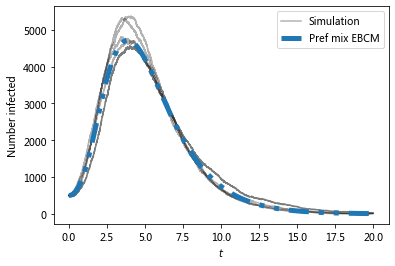

In [6]:
# Simulations and Models
for counter in range(iterations): #run simulations
    t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)
# plot the Pref mix EBCM
t, S, I, R = EoN.EBCM_pref_mix_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, label = 'Pref mix EBCM', linewidth=5, dashes=[4, 2, 1, 2, 1, 2])
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend();

Now compare with ODE predictions.  

- Read in the degree distribution of G
- use rho to initialize the various model equations.
- There are versions of these functions that allow you to specify the initial conditions rather than starting from a graph.


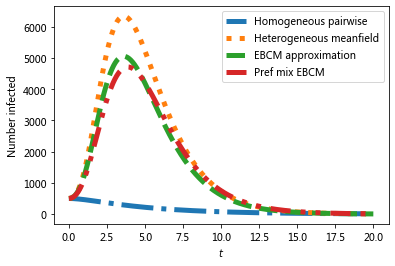

In [7]:
#we expect a homogeneous model to perform poorly because the degree
#distribution is very heterogeneous
t, S, I, R = EoN.SIR_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)
#meanfield models will generally overestimate SIR growth because they
#treat partnerships as constantly changing.
t, S, I, R = EoN.SIR_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)
#The EBCM model does not account for degree correlations or clustering
t, S, I, R = EoN.EBCM_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '--', label = 'EBCM approximation', linewidth = 5)
#the preferential mixing model captures degree correlations.
t, S, I, R = EoN.EBCM_pref_mix_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, label = 'Pref mix EBCM', linewidth=5, dashes=[4, 2, 1, 2, 1, 2])
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend();
# plt.savefig('SIR_BA_model_vs_sim.png')

The preferential mixing version of the EBCM approach provides the best approximation to the (gray) simulated epidemics. 

We now move on to SIS epidemics:


## SIS

In [8]:
#Now run for SIS.   
# Simulation is much slower so need smaller network
N=10**4
G=nx.barabasi_albert_graph(N, 5) #create a barabasi-albert graph

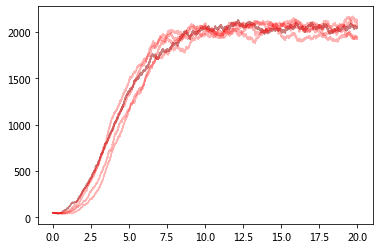

In [9]:
# simulations
for counter in range(iterations):
    t, S, I = EoN.fast_SIS(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'r', alpha=0.3)

Now compare with ODE predictions.  
- Read in the degree distribution of G
- and use rho to initialize the various model equations.
- There are versions of these functions that allow you to specify the initial conditions rather than starting from a graph.


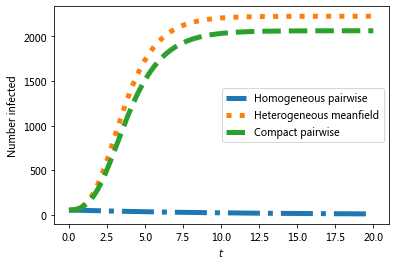

In [10]:
#we expect a homogeneous model to perform poorly because the degree
#distribution is very heterogeneous

t, S, I = EoN.SIS_homogeneous_pairwise_from_graph(G, tau, gamma, rho=rho, tmax = tmax)
plt.plot(t, I, '-.', label = 'Homogeneous pairwise', linewidth = 5)

t, S, I = EoN.SIS_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)

t, S, I = EoN.SIS_compact_pairwise_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, '--', label = 'Compact pairwise', linewidth = 5)

plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend();

#plt.savefig('SIS_BA_model_vs_sim.png')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


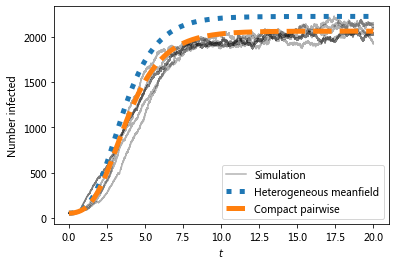

In [11]:
# Which model is better?
for counter in range(iterations):
    t, S, I = EoN.fast_SIS(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
    plt.plot(t, I, color = 'k', alpha=0.3)
t, S, I = EoN.SIS_heterogeneous_meanfield_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, ':', label = 'Heterogeneous meanfield', linewidth = 5)
t, S, I = EoN.SIS_compact_pairwise_from_graph(G, tau, gamma, rho=rho, tmax=tmax)
plt.plot(t, I, '--', label = 'Compact pairwise', linewidth = 5)
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend();

## Visualizing disease spread in a lattice network

### SIS

In [20]:
N=10**3
G=nx.barabasi_albert_graph(N, 5) #create a barabasi-albert graph

In [22]:
#we'll initially infect those near the middle
#initial_infections = [(u,v) for (u,v) in G if 45<u<55 and 45<v<55]
sim = EoN.fast_SIS(G, 1.0, 1.0, #initial_infecteds = initial_infections,
               return_full_data=True, tmax = 10)
pos = {node:node for node in G}
sim.set_pos(pos)

In [30]:
sim.node_history(1)

([0,
  0.6480038096909582,
  2.878859186164565,
  2.9153163284908272,
  3.5092942025944662,
  3.568385141191922,
  3.953701848185159,
  4.130846668005088,
  4.647110703032882,
  4.655021347166778,
  5.8659601120198435,
  5.930463898298382,
  6.224253021645784,
  6.227291277319202,
  6.264444402330622,
  6.320875535226936,
  6.758903198213538,
  6.783741136385256,
  8.001029042237164,
  8.031476668187205,
  8.375831529735354,
  8.409966778198903,
  8.749362275400193,
  8.765325875433902],
 ['S',
  'I',
  'S',
  'I',
  'S',
  'I',
  'S',
  'I',
  'S',
  'I',
  'S',
  'I',
  'S',
  'I',
  'S',
  'I',
  'S',
  'I',
  'S',
  'I',
  'S',
  'I',
  'S',
  'I'])

In [12]:
#each node is (u,v) where 0<=u,v<=99
G = nx.grid_2d_graph(100,100) 
#we'll initially infect those near the middle
initial_infections = [(u,v) for (u,v) in G if 45<u<55 and 45<v<55]
sim = EoN.fast_SIS(G, 1.0, 1.0, initial_infecteds = initial_infections,
               return_full_data=True, tmax = 10)
pos = {node:node for node in G}
sim.set_pos(pos)


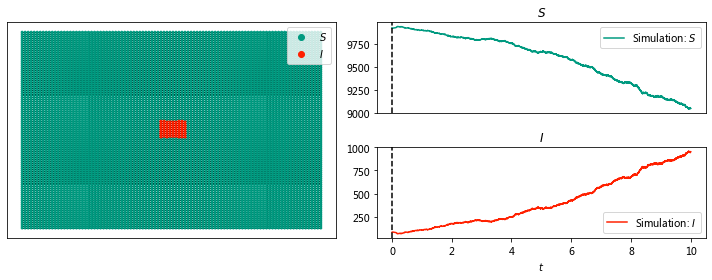

In [13]:
sim.display(0, node_size = 4); #display time 6
#plt.savefig('SIS_2dgrid.png')

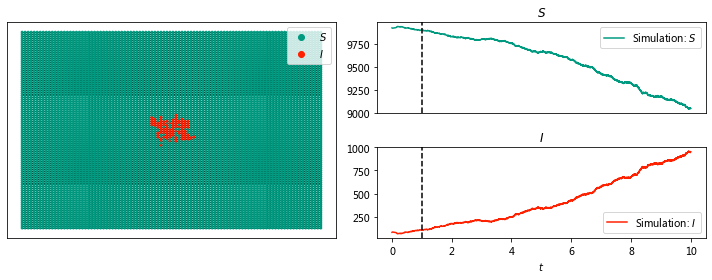

In [14]:
sim.display(1, node_size = 4); #display time 6
#plt.savefig('SIS_2dgrid.png')

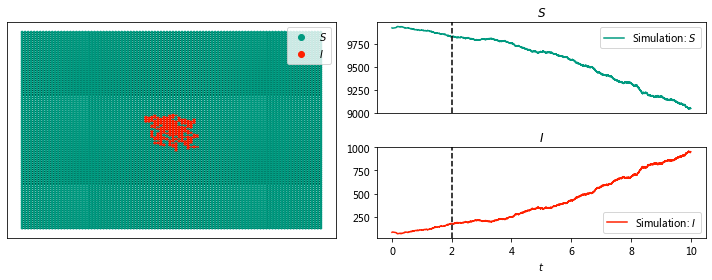

In [15]:
sim.display(2, node_size = 4);

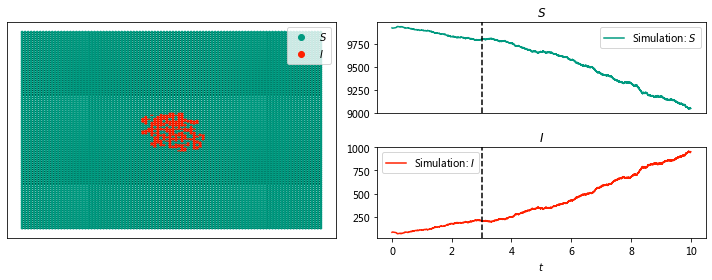

In [16]:
sim.display(3, node_size = 4);

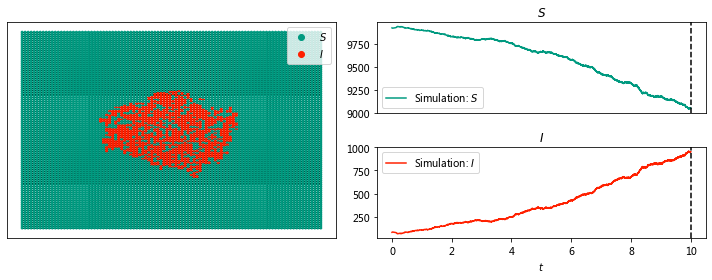

In [17]:
sim.display(10, node_size = 4);

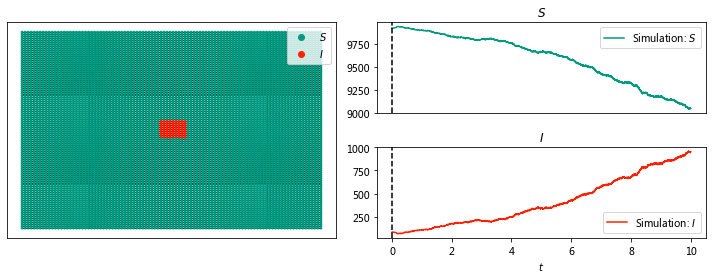

In [18]:
ani_sis=sim.animate(ts_plots=['S', 'I'], node_size = 4)

In [ ]:
# brew intall ffmpeg 

In [9]:
from IPython.display import display, HTML
display(HTML(ani_sis.to_html5_video()))

### SIR

In [1]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
G = nx.grid_2d_graph(100,100) #each node is (u,v) where 0<=u,v<=99
#we'll initially infect those near the middle
initial_infections = [(u,v) for (u,v) in G if 45<u<55 and 45<v<55]
sim = EoN.fast_SIR(G, 2.0, 1.0, initial_infecteds = initial_infections,
               return_full_data=True, tmax = 10)
pos = {node:node for node in G}
sim.set_pos(pos)
ani=sim.animate(ts_plots=['I', 'SIR'], node_size = 4)
ani.save('../vis/SIR_2dgrid.mp4', fps=5, extra_args=['-vcodec', 'libx264'])

In [9]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="../vis/SIR_2dgrid.mp4" type="video/mp4">
</video></div>

In [4]:
from IPython.display import display, HTML
display(HTML(ani.to_html5_video()))

In [ ]:
# from ipywidgets import interact, fixed
# interact(sim.display, time=[0, 10], node_size = 4);

## Play with many more examples.

https://epidemicsonnetworks.readthedocs.io/en/latest/Examples.html